In [8]:
# Importando bibliotecas
# Manipulação de dados espaciais  
import geopandas as gpd 

# Manipulação de dados tradicionais
import openpyxl
import pandas as pd 

Carregamento de dados

In [9]:
# Importar arquivo do excel com dados de lojas espalhados pelo Brasil
# DATAFRAME (df) -> colunas "tradicionais"
df_lojas = pd.read_excel(r"data\br_stores_db.xlsx", index_col="ID")

# Vizualizar dados
df_lojas

,LAT,LONG,ANO_INAUGURACAO,STATUS
ID,,,,
Loja_1,-5.10,-36.06,2010,DEACTIVATED
Loja_2,-17.34,-45.18,2022,ACTIVE
Loja_3,-15.93,-43.40,2018,ACTIVE
Loja_4,-18.70,-43.93,2018,ACTIVE
Loja_5,-16.72,-43.52,2018,ACTIVE
...,...,...,...,...
Loja_218,-10.52,-38.00,2022,DEACTIVATED
Loja_219,-10.62,-37.95,2023,DEACTIVATED
Loja_220,-10.80,-38.04,2023,DEACTIVATED


In [16]:
# Importar arquivo shapefile (vetorial) contornos de estados do Brasil
# GEODATAFRAME (gdf) -> coluna "geometry"
# Recomendação de vídeo: Análises Espaciais com Python -> mostrar thumb
gdf_estados = gpd.read_file(r"data\UFEBRASIL.shp")

# Vizualizar dados
gdf_estados.head(3)


,ID,CD_GEOCODU,NM_ESTADO,NM_REGIAO,geometry
0,1,11,RONDÔNIA,NORTE,"POLYGON ((-63.32721 -7.97672, -63.11838 -7.977..."
1,2,12,ACRE,NORTE,"POLYGON ((-73.18253 -7.3355, -73.1368 -7.35202..."
2,3,13,AMAZONAS,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."


In [19]:
# Vizualizar sistema de coordenadas (CRS) do arquivo
# (mostrar exemplos de sistemas de coordenadas)
gdf_estados.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Tratamento e Preparação dos dados

In [17]:
df_lojas.head()

,LAT,LONG,ANO_INAUGURACAO,STATUS
ID,,,,
Loja_1,-5.10,-36.06,2010,DEACTIVATED
Loja_2,-17.34,-45.18,2022,ACTIVE
Loja_3,-15.93,-43.40,2018,ACTIVE
Loja_4,-18.70,-43.93,2018,ACTIVE
Loja_5,-16.72,-43.52,2018,ACTIVE


In [18]:
# Definir sistema de coordenadas padrão para os dados espaiais
# # Ambas as bases de dados precisam estar na MESMA PROJEÇÃO
# (mostrar exemplo de misalignment de projeções) 
CRS = "EPSG:4647" # SIRGAS 2000 (Padrão brasileiro)

# Usaremos as colunas ne LAT (y) E LONG (x) para criar geometria do tipo POINT
# (mostrar exemplo de mapas geográficos com sistemas (x, y))
pontos_de_coordenadas = gpd.points_from_xy(x=df_lojas["LONG"], y=df_lojas["LAT"])

# Converter dataframe para geodataframe a partir das coordenadas (LAT e LONG)
gdf_lojas = gpd.GeoDataFrame(df_lojas, geometry=pontos_de_coordenadas, crs=CRS)

# Vizualizar dados
gdf_lojas

,LAT,LONG,ANO_INAUGURACAO,STATUS,geometry
ID,,,,,
Loja_1,-5.10,-36.06,2010,DEACTIVATED,POINT (-36.06 -5.1)
Loja_2,-17.34,-45.18,2022,ACTIVE,POINT (-45.18 -17.34)
Loja_3,-15.93,-43.40,2018,ACTIVE,POINT (-43.4 -15.93)
Loja_4,-18.70,-43.93,2018,ACTIVE,POINT (-43.93 -18.7)
Loja_5,-16.72,-43.52,2018,ACTIVE,POINT (-43.52 -16.72)
...,...,...,...,...,...
Loja_218,-10.52,-38.00,2022,DEACTIVATED,POINT (-38 -10.52)
Loja_219,-10.62,-37.95,2023,DEACTIVATED,POINT (-37.95 -10.62)
Loja_220,-10.80,-38.04,2023,DEACTIVATED,POINT (-38.04 -10.8)


Juntando arquivos 

In [ ]:
# Relembrando arquivo dos estados...
gdf_estados.head()

In [27]:
# Adicionar ao geodataframe de lojas (A) as informações dos estados (B)
# A lógica será feita por meio de uma "junção espacial" (spatial join)
# em que a partir das coordenadas das lojas, localizamos o ESTADO que ela pertence
# usando a lógica do ```within`` (veja exemplo abaixo)
gdf_completo = gpd.sjoin(
    left_df=gdf_lojas, # A
    right_df=gdf_estados[["NM_REGIAO", "NM_ESTADO", "geometry"]], # B
    how="left",
    predicate="within",
)

# Vizualizar dados
gdf_completo

C:\Users\EDUCAÇÃO PC\AppData\Local\Temp\ipykernel_1604\2275055632.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4647
Right CRS: EPSG:4674

  gdf_completo = gpd.sjoin(


,LAT,LONG,ANO_INAUGURACAO,STATUS,geometry,index_right,NM_REGIAO,NM_ESTADO
ID,,,,,,,,
Loja_1,-5.10,-36.06,2010,DEACTIVATED,POINT (-36.06 -5.1),10,NORDESTE,RIO GRANDE DO NORTE
Loja_2,-17.34,-45.18,2022,ACTIVE,POINT (-45.18 -17.34),16,SUDESTE,MINAS GERAIS
Loja_3,-15.93,-43.40,2018,ACTIVE,POINT (-43.4 -15.93),16,SUDESTE,MINAS GERAIS
Loja_4,-18.70,-43.93,2018,ACTIVE,POINT (-43.93 -18.7),16,SUDESTE,MINAS GERAIS
Loja_5,-16.72,-43.52,2018,ACTIVE,POINT (-43.52 -16.72),16,SUDESTE,MINAS GERAIS
...,...,...,...,...,...,...,...,...
Loja_218,-10.52,-38.00,2022,DEACTIVATED,POINT (-38 -10.52),15,NORDESTE,BAHIA
Loja_219,-10.62,-37.95,2023,DEACTIVATED,POINT (-37.95 -10.62),15,NORDESTE,BAHIA
Loja_220,-10.80,-38.04,2023,DEACTIVATED,POINT (-38.04 -10.8),14,NORDESTE,SERGIPE


In [29]:
# Remover colunas desnecessárias 
gdf_completo = gdf_completo.drop(columns=["geometry", "index_right"])

# Ordenas dados por Região
gdf_completo = gdf_completo.sort_values("NM_REGIAO")

# Vizualizar dados 
gdf_completo

,LAT,LONG,ANO_INAUGURACAO,STATUS,NM_REGIAO,NM_ESTADO
ID,,,,,,
Loja_20,-17.27,-49.89,2021,ACTIVE,CENTRO-OESTE,GOIÁS
Loja_18,-16.36,-47.84,2021,ACTIVE,CENTRO-OESTE,GOIÁS
Loja_1,-5.10,-36.06,2010,DEACTIVATED,NORDESTE,RIO GRANDE DO NORTE
Loja_139,-5.25,-37.11,2022,ACTIVE,NORDESTE,RIO GRANDE DO NORTE
Loja_140,-5.25,-37.11,2022,ACTIVE,NORDESTE,RIO GRANDE DO NORTE
...,...,...,...,...,...,...
Loja_16,-17.42,-44.49,2022,ACTIVE,SUDESTE,MINAS GERAIS
Loja_74,-15.17,-41.99,2023,DEACTIVATED,SUDESTE,MINAS GERAIS
Loja_163,-17.08,-43.41,2023,DEACTIVATED,SUDESTE,MINAS GERAIS


In [30]:
# Exportar dados de volta para arquivo do excel
gdf_completo.to_excel("data/br_stores_db_completo.xlsx")

Análise de dados

<Axes: ylabel='NM_REGIAO'>

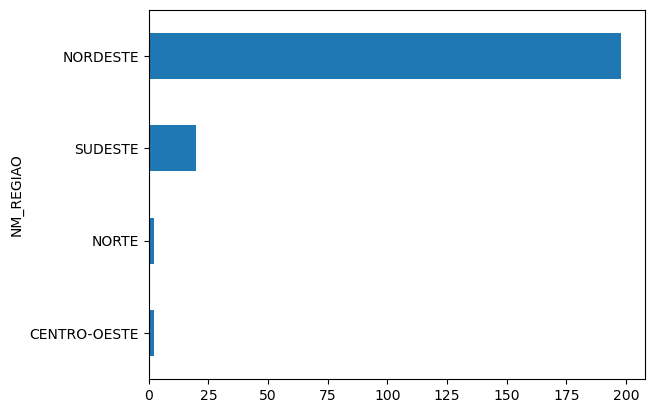

In [33]:
# Quais regiões com mais lojas?
lojas_regiao = gdf_completo["NM_REGIAO"].value_counts()
lojas_regiao.sort_values().plot(kind="barh")

<Axes: ylabel='NM_ESTADO'>

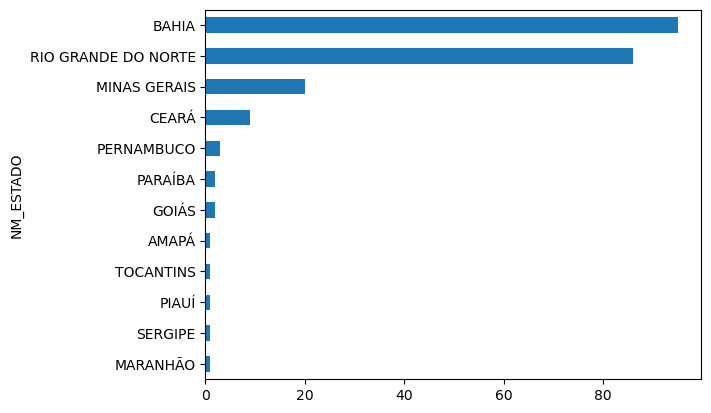

In [34]:
# Quais estados com mais lojas?
lojas_estado = gdf_completo["NM_ESTADO"].value_counts()
lojas_estado.sort_values().plot(kind="barh")

<Axes: xlabel='ANO_INAUGURACAO'>

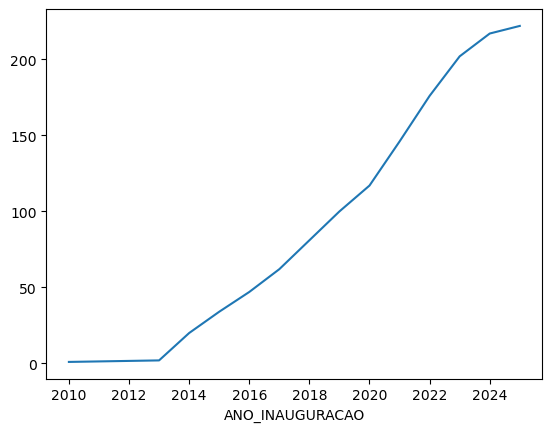

In [35]:
# Como estão a evolução temporal de abertura de lojas?
acumulado_lojas_abertas= gdf_completo.groupby("ANO_INAUGURACAO").size().cumsum()
acumulado_lojas_abertas.plot()

In [36]:
# Qual ano médio de inauguração por região?
ano_medio_regiao = gdf_completo.groupby("NM_REGIAO")["ANO_INAUGURACAO"].mean().round(0)
ano_medio_regiao

NM_REGIAO
CENTRO-OESTE    2021.0
NORDESTE        2019.0
NORTE           2019.0
SUDESTE         2021.0
Name: ANO_INAUGURACAO, dtype: float64

In [37]:
import matplotlib.pyplot as plt 

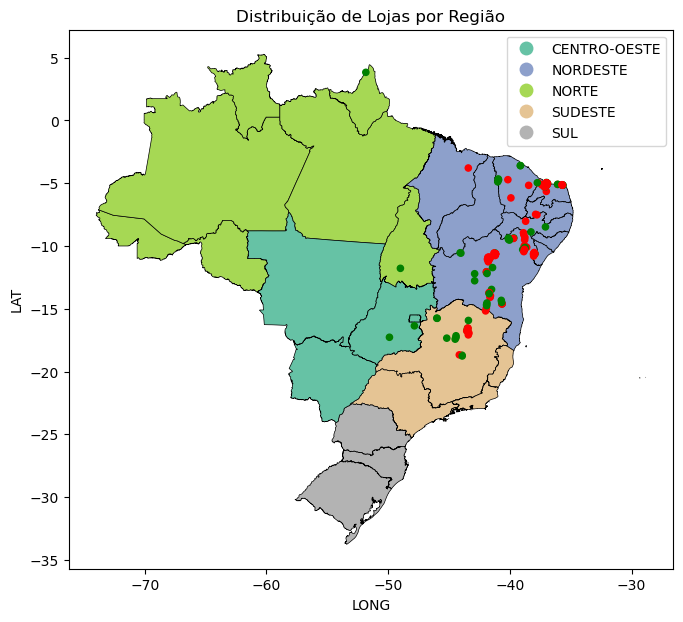

In [42]:
# Criar a figura
fig, ax = plt.subplots(figsize=(10, 7))

# Plotar os estados coloridos por região
gdf_estados.plot(
    ax=ax,
    column="NM_REGIAO",
    cmap="Set2",
    edgecolor="black",
    linewidth=0.5,
    legend=True,
)

# Plotar as lojas
df_lojas.plot.scatter(
    x="LONG",
    y="LAT",
    ax=ax,
    c=df_lojas["STATUS"].map(
        ({"ACTIVE": "green", "DEACTIVATED": "red"})
    ),
)

plt.title("Distribuição de Lojas por Região")
plt.show()